##**Redes Neurais Multicamadas com Python**

**1. Entendimento**

Neste estudo será apresentada a implementação de Redes Neurais Multicamadas (Multilayer Perceptrons – MLPs) utilizando Python e a biblioteca de Deep Learning Keras, que atualmente está integrada ao TensorFlow. O objetivo é demonstrar, na prática, como construir, treinar e avaliar modelos de redes neurais capazes de resolver problemas de previsão e classificação.

De forma resumida, uma rede neural multicamadas (MLP – Multilayer Perceptron) é um modelo de aprendizado de máquina composto por várias camadas de neurônios artificiais.

Seu funcionamento pode ser descrito da seguinte maneira:

  - Os neurônios são organizados em duas ou mais camadas, sendo obrigatório ter pelo menos uma camada de entrada e uma camada de saída.

  - A camada de entrada recebe os dados brutos que alimentam a rede.

  - As camadas ocultas transformam e combinam essas informações, ajustando pesos e aplicando funções de ativação para capturar relações complexas.

  - A camada de saída produz o resultado final, que pode ser uma previsão numérica (regressão) ou uma classificação (rótulo de categoria).

As Redes Neurais Artificiais podem ser representadas como um grafo acíclico dirigido, no qual os nós correspondem aos neurônios e as arestas representam as conexões entre eles. Esse tipo de estrutura não contém ciclos, ou seja, não há caminhos que retornem ao mesmo nó.

O tipo de camada mais comum é a fully connected layer, também chamada de Dense Layer. Nesse modelo, cada neurônio de uma camada está conectado a todos os neurônios da camada anterior. Esse arranjo é conhecido como Rede Neural Feedforward, pois a informação flui apenas em uma direção: da camada de entrada, passando pelas camadas ocultas, até chegar à camada de saída.

Para efeito de comparação, em Redes Neurais Recorrentes (RNNs) as conexões podem formar loops, permitindo que a saída de um neurônio em um instante seja utilizada como entrada em passos seguintes. Por isso, as RNNs não são puramente feedforward, mas sim capazes de lidar com dependências temporais.

Agora daremos início à implementação prática de uma rede neural utilizando a biblioteca Keras aplicada ao conjunto de dados MNIST.

**2. MNIST**

O MNIST é um dos datasets mais clássicos da área de visão computacional. Ele contém 70.000 imagens de dígitos manuscritos, variando de 0 a 9, cada uma com dimensão de 28 × 28 pixels em escala de cinza.

Esse conjunto de dados é amplamente utilizado para testar, validar e comparar algoritmos de classificação de imagens, servindo como ponto de partida em muitos estudos de aprendizado de máquina e deep learning.

No Python, o MNIST já está disponível em bibliotecas como o scikit-learn e também no próprio Keras, podendo ser importado diretamente sem necessidade de download manual.

Na próxima etapa, vamos importar as bibliotecas necessárias, carregar o conjunto de dados e exibir algumas informações básicas sobre suas características.


In [ ]:


# importando os pacotes necessários
from tensorflow.keras.datasets import mnist
from sklearn.datasets import fetch_openml
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelBinarizer
from keras.models import Sequential
from keras.optimizers import SGD
import numpy as np
import matplotlib.pyplot as plt

O array que representa o dataset contém 70.000 linhas, sendo cada linha correspondente a uma imagem do MNIST. Como cada imagem possui dimensão de 28 × 28 pixels, os valores foram achatados em um vetor unidimensional de 784 colunas, onde cada elemento representa a intensidade de um pixel em escala de cinza.

Na visualização de exemplo, a imagem escolhida aleatoriamente foi o dígito “8”, confirmando que os dados carregados estão corretamente estruturados e prontos para serem utilizados no treinamento da rede neural.

[INFO] Número de imagens: 70000
[INFO] Pixels por imagem: 784
[INFO] Imagem aleatória do MNIST com label '8':


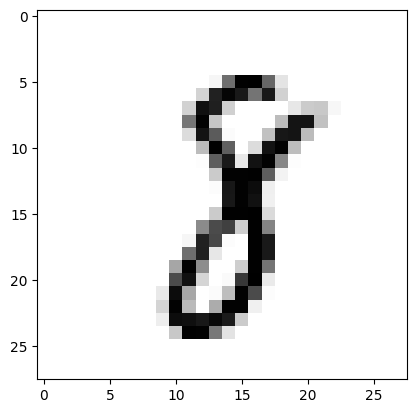

In [ ]:
#Importar o conjunto de datasets MNIST
dataset = fetch_openml('mnist_784', version=1)
data, labels = dataset.data, dataset.target.astype(int)

#Exibir algumas informações do dataset MNIST
print("[INFO] Número de imagens: {}".format(data.shape[0]))
print("[INFO] Pixels por imagem: {}".format(data.shape[1]))

np.random.seed(17)
randomIndex = np.random.randint(0, data.shape[0])
print("[INFO] Imagem aleatória do MNIST com label '{:.0f}':".format(labels[randomIndex]))

plt.imshow(data.iloc[randomIndex].to_numpy().reshape((28,28)), cmap="Greys")
plt.show()


**3. Split**

O próximo passo consiste em dividir o conjunto de imagens em treino (75%) e teste (25%). O conjunto de treino será utilizado para ajustar os pesos da rede neural, enquanto o conjunto de teste servirá para avaliar se o modelo é capaz de generalizar seu aprendizado para dados novos.

É importante que os dois conjuntos sejam independentes, evitando problemas como o overfitting, situação em que o modelo memoriza os dados de treino e apresenta alta acurácia apenas neles, mas falha ao lidar com exemplos nunca vistos.

Além disso, os rótulos das imagens (labels), que inicialmente são representados como números inteiros de 0 a 9, precisam ser convertidos em vetores binários para que a rede neural consiga processá-los corretamente. Esse processo é conhecido como one-hot encoding e será realizado utilizando a classe LabelBinarizer.



In [ ]:
# dividir o dataset entre train (75%) e test (25%)
(trainX, testX, trainY, testY) = train_test_split(data, labels, test_size=0.25, random_state=42)

# converter labels de inteiros para vetores
lb = LabelBinarizer()
trainY = lb.fit_transform(trainY)
testY = lb.transform(testY)



**4. Arquitetura da Rede Neural**

Com o dataset já preparado e processado, o próximo passo é definir a arquitetura da Rede Neural. Neste exemplo, será utilizada uma rede com quatro camadas, definidas de forma arbitrária.

A primeira camada é a de entrada e recebe como input os valores de cada pixel da imagem. Como cada imagem possui 28 × 28 pixels, essa camada contará com 784 neurônios.

As camadas ocultas (hidden layers) foram configuradas com 128 neurônios na primeira (l1) e 64 neurônios na segunda (l2). Esses valores também foram definidos de maneira arbitrária, mas refletem uma escolha comum em arquiteturas iniciais de redes neurais.

A camada de saída (l3) terá 10 neurônios, correspondentes ao número de classes do problema, já que existem 10 dígitos possíveis (de 0 a 9).

A rede neural implementada neste projeto apresenta as seguintes características:

  - Arquitetura feedforward: a informação flui apenas em uma direção, da camada de entrada para as camadas ocultas e, finalmente, para a camada de saída.

  - Instanciação pela classe Sequential: a rede é construída de forma sequencial, em que a saída de uma camada serve como entrada para a próxima.

  - Camadas totalmente conectadas (Dense layers): cada neurônio está conectado a todos os neurônios da camada anterior.

  - Função de ativação das camadas ocultas: foi utilizada a função sigmoid, que transforma os valores reais em um intervalo entre [0, 1]. Embora funcione, uma alternativa bastante comum é a função ReLU (Rectified Linear Unit), que costuma acelerar o treinamento e melhorar a acurácia.

  - Função de ativação da camada de saída: foi utilizada a softmax, adequada para problemas de classificação multiclasse, pois transforma as saídas em probabilidades associadas a cada uma das classes possíveis (neste caso, os dígitos de 0 a 9).

In [ ]:
model = Sequential()
model.add(Dense(128, input_shape=(784,), activation="sigmoid"))
model.add(Dense(64, activation="sigmoid"))
model.add(Dense(10, activation="softmax"))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


**5. Treinamento do Modelo**

Para o treinamento do modelo será utilizado o algoritmo Stochastic Gradient Descent (SGD), configurado com as seguintes características:

  - Learning rate = 0.01: taxa de aprendizado inicial, que pode ser ajustada de acordo com a performance do modelo.

  - Loss function = categorical_crossentropy: função de perda apropriada para problemas de classificação multiclasse, já que o output possui mais de duas classes possíveis.

O SGD atua ajustando os pesos da rede de forma iterativa, com o objetivo de minimizar a função de perda. O termo stochastic se refere ao fato de que, em vez de utilizar todo o dataset de uma só vez, o algoritmo atualiza os pesos a partir de mini-batches, ou subconjuntos dos dados de treino. Isso torna o processo de treinamento mais rápido e ainda ajuda o modelo a escapar de mínimos locais, aumentando as chances de convergência para uma solução melhor.

A função de perda categorical_crossentropy mede a discrepância entre as probabilidades previstas pela rede e as classes reais, servindo como guia para o ajuste dos pesos durante o processo de aprendizado.

In [ ]:
#treinamento do modelo
print("[INFO] treinando a rede neural...")
model.compile(optimizer=SGD(0.01), loss="categorical_crossentropy",
             metrics=["accuracy"])

H = model.fit(trainX, trainY, batch_size=128, epochs=100, verbose=2,
         validation_data=(testX, testY))

[INFO] treinando a rede neural...
Epoch 1/100
411/411 - 3s - 7ms/step - accuracy: 0.9125 - loss: 0.3711 - val_accuracy: 0.9089 - val_loss: 0.3787
Epoch 2/100
411/411 - 3s - 8ms/step - accuracy: 0.9152 - loss: 0.3508 - val_accuracy: 0.9105 - val_loss: 0.3599
Epoch 3/100
411/411 - 5s - 12ms/step - accuracy: 0.9183 - loss: 0.3322 - val_accuracy: 0.9139 - val_loss: 0.3431
Epoch 4/100
411/411 - 2s - 6ms/step - accuracy: 0.9211 - loss: 0.3168 - val_accuracy: 0.9146 - val_loss: 0.3323
Epoch 5/100
411/411 - 2s - 6ms/step - accuracy: 0.9245 - loss: 0.3042 - val_accuracy: 0.9154 - val_loss: 0.3214
Epoch 6/100
411/411 - 3s - 9ms/step - accuracy: 0.9268 - loss: 0.2917 - val_accuracy: 0.9178 - val_loss: 0.3146
Epoch 7/100
411/411 - 4s - 11ms/step - accuracy: 0.9291 - loss: 0.2819 - val_accuracy: 0.9198 - val_loss: 0.3010
Epoch 8/100
411/411 - 2s - 5ms/step - accuracy: 0.9300 - loss: 0.2723 - val_accuracy: 0.9203 - val_loss: 0.2946
Epoch 9/100
411/411 - 2s - 6ms/step - accuracy: 0.9333 - loss: 0.261

**6. Avaliação do Modelo**

Para avaliar o desempenho da rede, será utilizado o método model.predict, responsável por gerar previsões a partir do dataset. No caso do conjunto de teste, que contém 17.500 imagens, o modelo irá calcular a probabilidade de cada amostra pertencer a uma das 10 classes possíveis (dígitos de 0 a 9).

A previsão final para cada imagem é obtida atribuindo o rótulo (label) correspondente ao dígito com maior probabilidade. Dessa forma, cada imagem do conjunto de teste recebe uma classificação entre 0 e 9, permitindo comparar os resultados obtidos pelo modelo com os valores reais e, assim, medir sua acurácia.

In [ ]:
predictions = model.predict(testX, batch_size=128)

#mostra o resultado do desempenho do modelo para cada classe do MNIST
print (classification_report(testY.argmax(axis=1), predictions.argmax(axis=1)))

137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      1714
           1       0.97      0.98      0.98      1977
           2       0.95      0.95      0.95      1761
           3       0.94      0.95      0.94      1806
           4       0.95      0.96      0.95      1587
           5       0.95      0.94      0.95      1607
           6       0.96      0.97      0.97      1761
           7       0.96      0.96      0.96      1878
           8       0.96      0.93      0.94      1657
           9       0.95      0.94      0.94      1752

    accuracy                           0.96     17500
   macro avg       0.95      0.95      0.95     17500
weighted avg       0.96      0.96      0.95     17500



O próximo passo é plotar as curvas de acurácia e perda ao longo das iterações (épocas de treinamento). Essa visualização é importante porque permite analisar de forma intuitiva o comportamento do modelo durante o aprendizado.

Com os gráficos, é possível verificar se a rede está convergindo adequadamente ou se apresenta problemas como overfitting — situação em que a acurácia no treino continua aumentando, mas a acurácia no teste estagna ou diminui, enquanto a perda do teste cresce. Dessa forma, o acompanhamento visual das métricas fornece um diagnóstico rápido sobre a qualidade do treinamento e auxilia na tomada de decisões, como ajustar hiperparâmetros, modificar a arquitetura da rede ou aplicar técnicas de regularização.

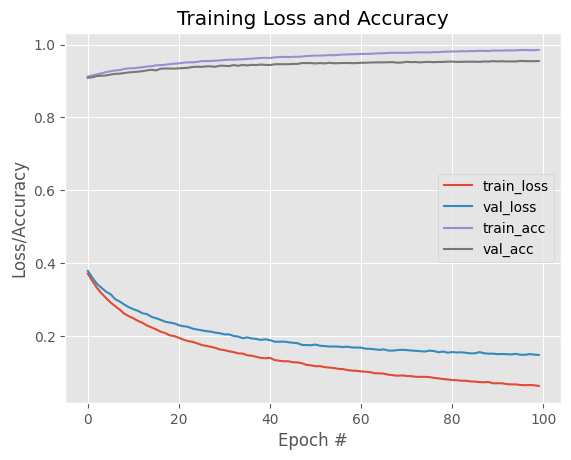

In [ ]:
# plotar loss e accuracy para os datasets 'train' e 'test'
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0,100), H.history["loss"], label="train_loss")
plt.plot(np.arange(0,100), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0,100), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0,100), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()


**7. Conclusões**

Loss:
- Analisando o gráfico, verificamos que a train_loss e val_loss deminuem constantemente à medida que as epochs avançam. Isso indica que o modelo está aprendendo e ajustando os pesos corretamente.

- A diferença entre train_loss e val_loss é pequena, indicando overfitting leve ou ausente.


Acurácia:
- Ao final das 100 epochs, a rede conseguiu atingir uma acurácia de 96%. Isso significa que o modelo está classificando corretamente a maioria das imagens, tanto no treino quanto na validação.

Outras observações:
- Loss decrescendo e accuracy aumentando é o comportamento esperado.
- Validação acompanhamento o treino indica boa generalização.
- train_acc está levemente acima de val_acc, o que é normal. Se o gap aumentar muito, pode indicar overfitting.
- 100 epochs parece adequado. O modelo está aprendendo, generalizando para o conjunto de validação, mas já se aproxima da convergência. Poderia melhorar ajustando outros parâmetros.

